# Gerando a base de dados

In [ ]:
!pip install nxviz=='0.6.3'
!pip install matplotlib=='3.1.3'

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nxviz import CircosPlot
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd
import json
from operator import itemgetter

In [ ]:
# Lendo o arquivo Json com 1000 playlists spotify
start = 0
end = 1000
path = 'mpd.slice.0-999.json'
d = json.load(open(path, 'r'))
thisSlice = pd.DataFrame.from_dict(d['playlists'], orient='columns')

In [ ]:
# Código retirado do repositório https://github.com/vaslnk/Spotify-Song-Recommendation-ML

# Fazendo um DataFrame tendo como base de analise o nome do artista
songPlaylistArray = []
for index, row in thisSlice.iterrows():
    for track in row['tracks']:
        songPlaylistArray.append([track['artist_name'], track['track_name'], row['pid']])
songPlaylist = pd.DataFrame(songPlaylistArray, columns=['artist_name', 'track_name', 'pid'])

#print(songPlaylist.shape)
#songPlaylist.head(10)

In [ ]:
# criando as ligacoes de cada musica com as demais que estao na mesma playlist
list_edges = []
for i in songPlaylistArray:
  for j in songPlaylistArray:
    if(j[2] == i[2] and j[0] != i[0]):
      list_edges.append([i[0], j[0]])
    if(j[2] > i[2]):
      break

In [ ]:
# criando o grafo
dataframe = pd.DataFrame(list_edges, columns=['p1', 'p2'])

G = nx.from_pandas_edgelist(
    dataframe, 
    "p1", 
    "p2", 
    create_using=nx.Graph()
)

In [ ]:
# Pegando o primeiro subgrafo da rede (no qual eh o maior entre os 5 subgrafos que esxiste nesse grafo)
G_conexo = list(nx.connected_components(G))[0]

In [ ]:
# removendo os subgrafos menores do grafo total
to_remove = []
for index in G:
  if index not in G_conexo:
    to_remove.append(index)

for i in to_remove:
  G.remove_node(i)

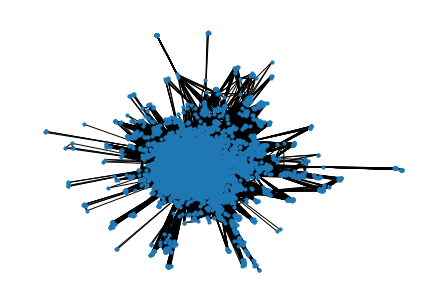

In [ ]:
nx.draw(G,  node_size = 10)
plt.show()

# Eccentricity, Diameter, Periphery, radius and center 

Primeiramente observe o grafo no qual é usado para obtenção dos dados de "eccentricity", "diameter", "periphery", "radius" e "center".
Mas o que é cada um deles?
 - Eccentricity: diz respeito a que distância normal da rede completa está situado cada nó, então quanto mais perto de 6, mais no extremo do grafo estará, ou seja, menos frequente.
 - Diameter: é o valor de eccentricity máximo que existe na rede.
 - Periphery: são todos os nós com o valor de eccentricity iguais ao diameter.
 - Radius: seguindo a lógica do diameter, mas visão exatamente o contrário, é o valor de eccentricity menor que existe na rede.
 - Center: são todos os nós que tem a eccentricity iguais ao radius.

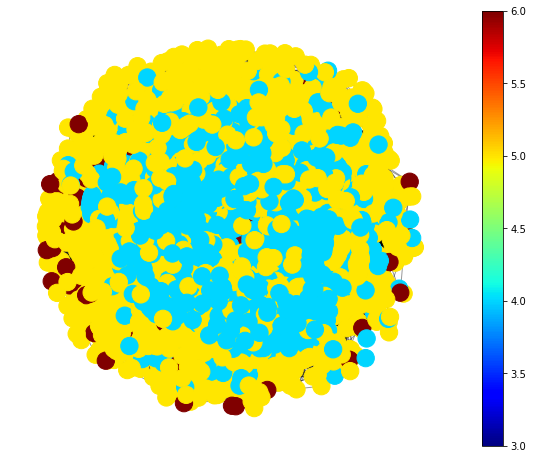

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
#nx.draw_networkx_labels(G, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [ ]:
nx.eccentricity(G)

In [ ]:
nx.diameter(G)

6

In [ ]:
nx.periphery(G)

['Kelly Price',
 'Florida A&M University Gospel Choir',
 'Dottie Peoples & The Peoples Choice Chorale',
 'Donald Lawrence',
 'Benita Washington',
 'The Warriors, DR.Charles G. Hayes',
 'Shekinah Glory Ministry',
 'Smokie Norful',
 'Tamela Mann',
 'The Rance Allen Group',
 'CeCe Winans',
 'Los Hijos Del Rey',
 'Luis Santiago',
 'Daniel Calveti',
 'Marcos Witt',
 'Julio Melgar',
 'Danilo Montero',
 'Alex Campos',
 'Jesús Adrián Romero & Marcela Gandara',
 'Marcela Gandara',
 'Marco Barrientos',
 'Marco Barrientos & David Luckey',
 'En Espíritu Y En Verdad',
 'Vino Nuevo',
 'Jose Luis Reyes',
 'Inspiraciòn',
 'Tony Pérez',
 'Samuel Hernández',
 'Óscar Medina',
 'Luigi Castro',
 'Danny Berrios',
 'Ericson Alexander Molano',
 'Roberto Orellana',
 'Vertical',
 'Salida 7',
 'Crecer German',
 'Los Hijos De Hernández',
 'Grupo 360',
 'Los Del Arroyo',
 'Banda Renovacion',
 'Los Migueles "La Voz Original"',
 'David Nevue',
 'Paul Cardall',
 'Carlene Carter',
 'Franz Schubert',
 'Aldo Garcia',
 '

In [ ]:
nx.radius(G)

3

In [ ]:
G_center = nx.center(G)

In [ ]:
G_center

['Justin Bieber', 'Queen', 'Pitbull', 'Johnny Cash']

# Degree, Closeness, Betweenness and Eigenvector Centrality

## Degree centrality
- Essa métrica diz respeito a quantos vizinhos cada nó tem, sendo que no grafo, quanto mais vizinho, mais vermelho o vértice se torna e quanto menos vizinhos, mais azul o vértice se torna.

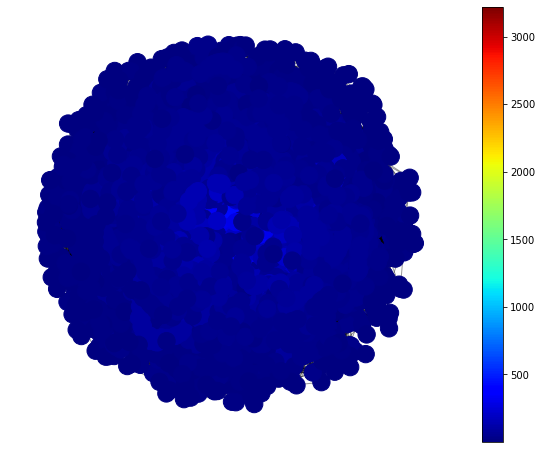

In [ ]:
# the degree of network(G)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
#nx.draw_networkx_labels(g, pos=pos, font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# Os 10 maiores valores
dict(sorted(nx.degree_centrality(G).items(), key = itemgetter(1), reverse = True)[:10])

{'Calvin Harris': 0.24876237623762376,
 'Coldplay': 0.2669141914191419,
 'Drake': 0.33199257425742573,
 'Ed Sheeran': 0.222256600660066,
 'Kanye West': 0.2781559405940594,
 'Kendrick Lamar': 0.2519595709570957,
 'Maroon 5': 0.22545379537953797,
 'Rihanna': 0.3149752475247525,
 'The Chainsmokers': 0.2581476897689769,
 'The Weeknd': 0.2748556105610561}

## Closeness centrality
- Essa métrica diz respeito a distância média de cada nó para todos os outros nós da rede, no qual é feito um calculo e referenciado o resultado da seguinte forma no grafo: caso o nó tenha um valor médio de distância pequeno, então está localizado normalmente longe dos outros nós, recebendo no grafo uma coloração mais azulada. Entretanto, caso o nó tenha um valor médio de distância alto, então está localizado normalmente perto dos demais nós da rede, recebendo no grafo uma coloração avermelhada.

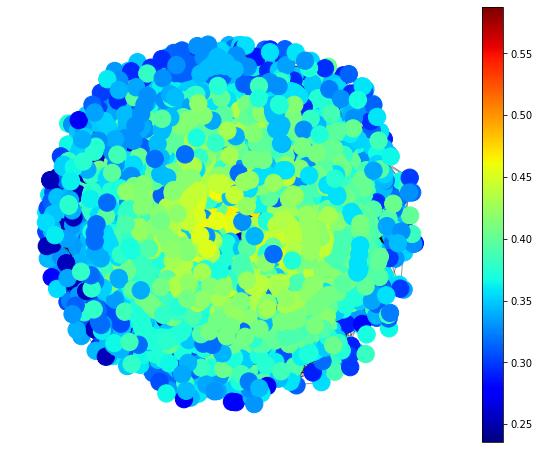

In [ ]:
# the closeness centrality of network(G)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(g, pos=pos, font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# Os 10 maiores valores
dict(sorted(nx.closeness_centrality(G).items(), key = itemgetter(1), reverse = True)[:10])

{'Calvin Harris': 0.5551674778127684,
 'Coldplay': 0.5652985074626866,
 'Drake': 0.5875295400836211,
 'Ed Sheeran': 0.548944120477835,
 'Kanye West': 0.5654963256736265,
 'Kendrick Lamar': 0.5567294441892513,
 'Maroon 5': 0.5490995582738702,
 'Rihanna': 0.5848009650180941,
 'The Chainsmokers': 0.5575618171362853,
 'The Weeknd': 0.567814476458187}

## Betweenness Centrality
- Essa métrica diz respeito a relevância do nó na distância mais curta entre todos os outros nós da rede, em outras palavras, o quanto o nó é frentemente usado para chegar de um nó a outro pelos menores caminhos possíveis. No grafo é representado da seguinte forma: quanto mais azul o vértice, menos requisitado ele é, entretanto quanto mais vermelho é o vértice, mais requisitado ele é.

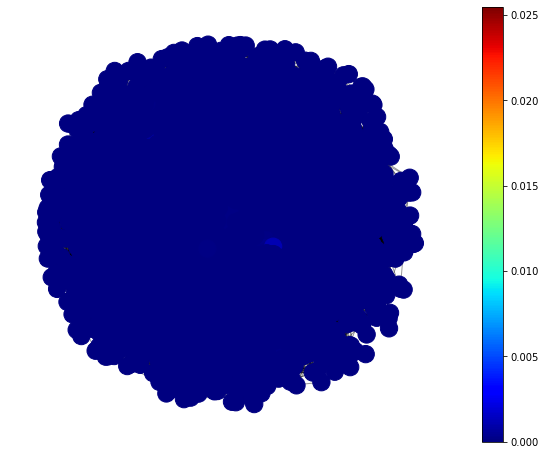

In [ ]:
# the Betweenness Centrality of network(G)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(g, pos=pos, font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

In [ ]:
# Os 10 maiores valores
dict(sorted(nx.betweenness_centrality(G).items(), key = itemgetter(1), reverse = True)[:10])

{'Calvin Harris': 0.010600361465249999,
 'Coldplay': 0.016328097515866984,
 'Drake': 0.021178451429365107,
 'Justin Bieber': 0.009546028148909372,
 'Kanye West': 0.01259749929120701,
 'Kendrick Lamar': 0.011553116219782682,
 'Rihanna': 0.025464212569259983,
 'The Chainsmokers': 0.011644817985096078,
 'The Weeknd': 0.012797519436765777,
 'Twenty One Pilots': 0.009068817328599797}

## Eigenvector Centrality
- Essa métrica diz respeito a quantidade de nós "importantes" que um nó está ligado. O importante nesse caso, é o quanto o vértice está ligado na rede. No grafo é representado da seguinte forma: quanto mais vermelho o nó, mais importante ele é, e quanto mais azul for o nó menos importante ele é.

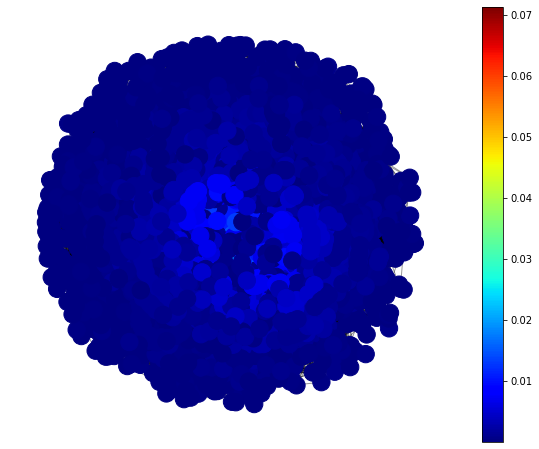

In [ ]:
# the Eigenvector Centrality of network(G)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(g, pos=pos, font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [ ]:
# Os 10 maiores valores
dict(sorted(nx.eigenvector_centrality(G).items(), key = itemgetter(1), reverse = True)[:10])

{'Calvin Harris': 0.06199011537457932,
 'Coldplay': 0.0606007438208185,
 'Drake': 0.07124378410473242,
 'Ed Sheeran': 0.05846297131435578,
 'Kanye West': 0.06565561468368343,
 'Kendrick Lamar': 0.059464441296273145,
 'Maroon 5': 0.06028088708985621,
 'Rihanna': 0.07075664209862244,
 'The Chainsmokers': 0.06316038787402027,
 'The Weeknd': 0.0656949007967956}

# Análise Bivariada

## Histogram, PDF and CDF

In [38]:
degree_sequence = pd.DataFrame(sorted([d for n, d in G.degree()], reverse=True))

In [ ]:
!pip uninstall pandas
!pip install pandas==1.1.5

- PDF: é a linha vermelha no gráfico, faz a representação da porcentagem de nós que tem o determinado número de vizinhos(a porcentagem é dada à direita no gráfico)

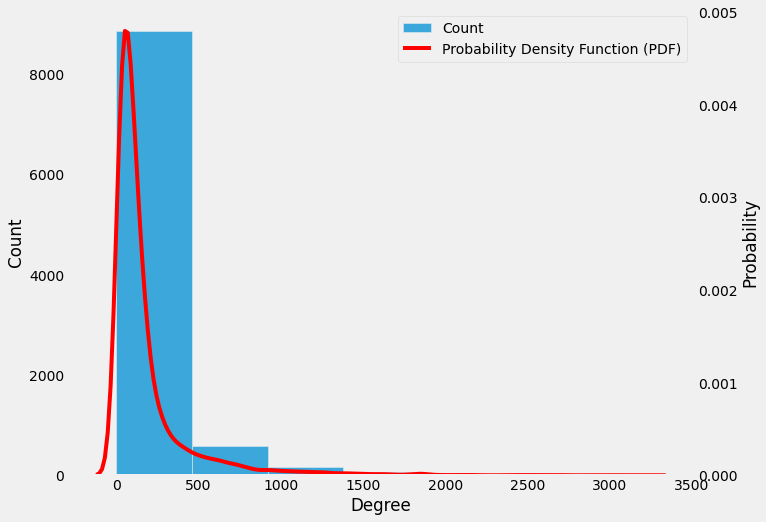

In [48]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence.loc[:,0],bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence.loc[:,0],color='r',label="Probability Density Function (PDF)",ax=ax2)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

- CDF: Representado pela linha vermelha no gráfico, ele diz que a partir de algum ponto na sua extensão, a porcentagem dos nós com a quantidade de vizinhos ou menos é dada(novamente, a porcentagem é dada à direita no gráfico).

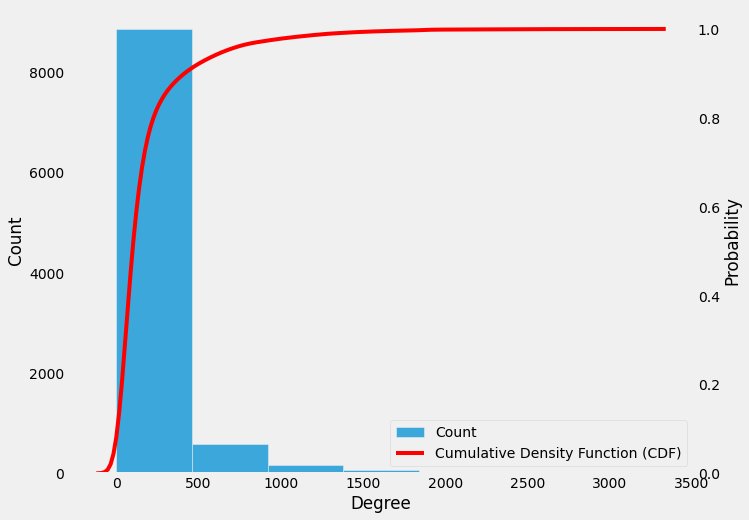

In [49]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence.loc[:,0],bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence.loc[:,0],color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Análise Multivariada

In [51]:
bc = pd.Series(nx.betweenness_centrality(G))
dc = pd.Series(nx.degree_centrality(G))
ec = pd.Series(nx.eigenvector_centrality(G))
cc = pd.Series(nx.closeness_centrality(G))

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
print(df.head())

   Betweenness    Degree  EigenVector  Closeness
0     0.001134  0.110355     0.036419   0.500749
1     0.000878  0.116852     0.043009   0.506557
2     0.003819  0.189150     0.055725   0.535957
3     0.003646  0.168626     0.052097   0.530939
4     0.005959  0.149134     0.047217   0.518863


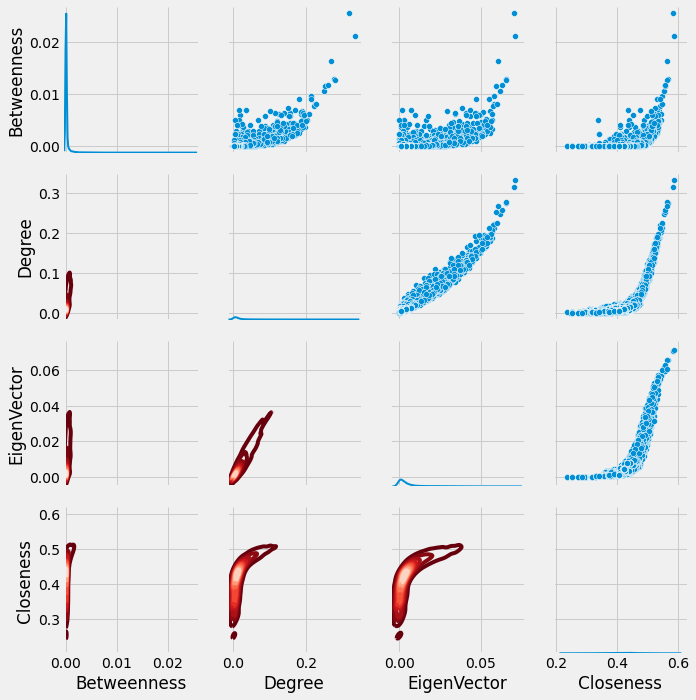

In [52]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

#plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

# Análise Decomposição da Rede 2 k-cores mais profundos

In [64]:
# How many k-cores does this network have?
set([v for k,v in nx.core_number(G).items()])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

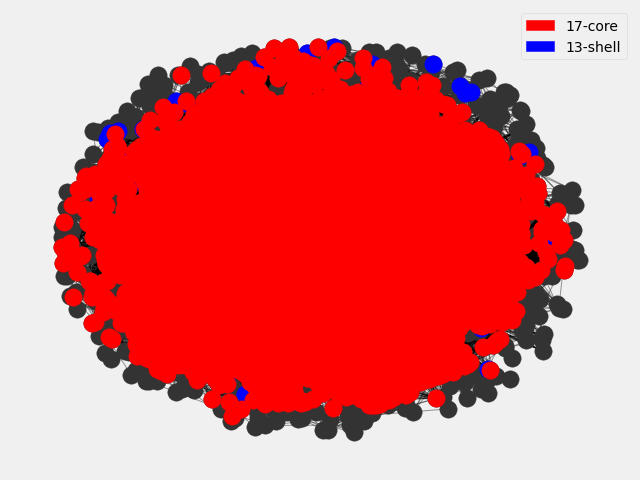

In [57]:
# the degree of network(G)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g_core_13 = nx.k_shell(G, 13)
g_core_17 = nx.k_core(G, 17)

# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g_core_13,
                 pos=pos,
                 node_color="blue")

nodes = nx.draw_networkx_nodes(g_core_17,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='17-core')
blue_patch = mpatches.Patch(color='blue', label='13-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
#plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()